In [2]:
import torch
from model.kmeansc import *
import time
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import adjusted_rand_score

def map_arrangement(arr):
    # Initialize the result array with None
    result = [None] * len(arr)

    # Variable to track the next number to assign
    num = 1  # Starting from 1

    # First pass to assign unique numbers
    for i, number in enumerate(arr):
        if result[i] is None:
            result[i] = num  # Assign the current number
            for j in range(i + 1, len(arr)):  # Start from the next index
                if arr[j] == number and result[j] is None:
                    result[j] = num  # Assign the same number to duplicates
            num += 1  # Increment for the next unique number

    return result

address = './data/SE(PeMS)_52.txt'

def check_type(obj):
    if isinstance(obj, np.ndarray):
        print("This is a NumPy array.")
    elif isinstance(obj, list):
        print("This is a Python list.")
    elif isinstance(obj, torch.Tensor):
        print("This is a PyTorch tensor.")
    else:
        print("This is an unknown type.")

In [3]:
with open(address, mode='r') as f:
    lines = f.readlines()
    temp = lines[0].split(' ')
    num_vertex, dims = int(temp[0]), int(temp[1])
    SE = torch.zeros((num_vertex, dims), dtype=torch.float32)
    for line in lines[1:]:
        temp = line.split(' ')
        index = int(temp[0])
        SE[index] = torch.tensor([float(ch) for ch in temp[1:]])

labels = equal_size_kmeans(SE, 65)
check_type(labels)
print(labels)
print(labels.dtype)

This is a NumPy array.
[53 53  4 14  4 42 16 48 19 29 53 44 38 59 13  9 24 13 53  4 16 42 32 13
 53 62 61 61 14 17 13  7 22 61 24 42 61  0  4 61 60  4 14 19 38 13 60 60
 44 12 24 29 42  8 60  7 60 58 10 14 44 29 58 21 11 14 42 34  6 31 58 17
  6  5 48 32 29 58  0 11 22 20 57 48  7 22 24 20 19 57 57 44 57 11 31 38
 56  6 31 10 24 32  5  7 31 57 32 56 32  7 56 56 31 44 22 54 18 38 56 26
 11  9 29 26 54  0 54 26 16 17 54 15 54 11  6 30  0 52 10 18 18 55 28 17
 22 55 23 35 55 10 52  6 18 59 59 48 52 52 59 48  5 18 17 16 23 52 51 55
 51 55 15 15 58 35 51 51 51 50  9  8 26 28 63 50 38 27 45 50 50 50 19 19
 36  1 49 21 63 35 35  5  3  3 59  3 64  3 64 64  3 64  2 49 49 49 49 47
 47 47 47  8 47  8 46 23 46  8  2  2 46 63 46 63 63 62 62 62 62  2 27 25
 46 15 15  0  1 12 45 45 45 23 10  9 35 45  2 43 12 28 43 43 43 34 34 34
 43 33 33 33 41 33 33 27 27 27 30 30 30 41 30 25 28 23 41 41 41 40 25 40
 40 40 40 39 39 39 39 39 37 37 37 26 21 25 21 37 21 20 20 20 37 25 36 34
 16  5  1  1 12  1 12 64  9 

### KMeans

In [4]:
start_time = time.time()

for run in range(5):
    all_labels = []
    for i in range(10):
        labels = equal_size_kmeans(SE, 65, 2)
        new_labels = map_arrangement(labels)
        all_labels.append(new_labels)

    total_nmi = sum(normalized_mutual_info_score(all_labels[i], all_labels[j]) for i in range(10) for j in range(10) if i != j)
    total_ari = sum(adjusted_rand_score(all_labels[i], all_labels[j]) for i in range(10) for j in range(10) if i != j)
                
    avg_nmi = total_nmi/90
    avg_ari = total_ari/90
    print("Run ", run+1, ": ", avg_nmi, avg_ari)

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.6f} seconds")

Run  1 :  0.7828176436686254 0.3270769230769231
Run  2 :  0.7891754876525355 0.34376153846153856
Run  3 :  0.7824643476475692 0.3249307692307694
Run  4 :  0.790063730666 0.3443153846153846
Run  5 :  0.7801404409059302 0.3192192307692306
Elapsed time: 1.864977 seconds


In [5]:
start_time = time.time()

for run in range(5):
    all_labels = []
    for i in range(10):
        labels = equal_size_kmeans(SE, 65, 10)
        new_labels = map_arrangement(labels)
        all_labels.append(new_labels)

    total_nmi = sum(normalized_mutual_info_score(all_labels[i], all_labels[j]) for i in range(10) for j in range(10) if i != j)
    total_ari = sum(adjusted_rand_score(all_labels[i], all_labels[j]) for i in range(10) for j in range(10) if i != j)
                
    avg_nmi = total_nmi/90
    avg_ari = total_ari/90
    print("Run ", run+1, ": ", avg_nmi, avg_ari)

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.6f} seconds")

Run  1 :  0.8297153903850989 0.4580961538461539
Run  2 :  0.826356203049068 0.44715769230769226
Run  3 :  0.8376606237668374 0.47907307692307655
Run  4 :  0.8284877077265549 0.4558461538461538
Run  5 :  0.826646651757704 0.4528692307692308
Elapsed time: 14.694195 seconds


In [6]:
start_time = time.time()

for run in range(1):
    all_labels = []
    for i in range(10):
        labels = equal_size_kmeans(SE, 65, 50)
        new_labels = map_arrangement(labels)
        all_labels.append(new_labels)

    total_nmi = sum(normalized_mutual_info_score(all_labels[i], all_labels[j]) for i in range(10) for j in range(10) if i != j)
    total_ari = sum(adjusted_rand_score(all_labels[i], all_labels[j]) for i in range(10) for j in range(10) if i != j)
                
    avg_nmi = total_nmi/90
    avg_ari = total_ari/90
    print("Run ", run+1, ": ", avg_nmi, avg_ari)

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.6f} seconds")

Run  1 :  0.8287033281005797 0.4578538461538463
Elapsed time: 19.297087 seconds


Iter count 5: NMI = 0.8201758007086607, ARI = 0.43119999999999997, Time = 2.641026 seconds
Iter count 10: NMI = 0.8285915982488595, ARI = 0.45740384615384616, Time = 4.005847 seconds
Iter count 15: NMI = 0.8320982378901348, ARI = 0.4643961538461538, Time = 5.933093 seconds
Iter count 20: NMI = 0.8363542077114591, ARI = 0.4793846153846155, Time = 8.977402 seconds
Iter count 25: NMI = 0.8323652660420356, ARI = 0.468376923076923, Time = 8.714930 seconds
Iter count 30: NMI = 0.8337515472570904, ARI = 0.4699692307692304, Time = 9.030202 seconds


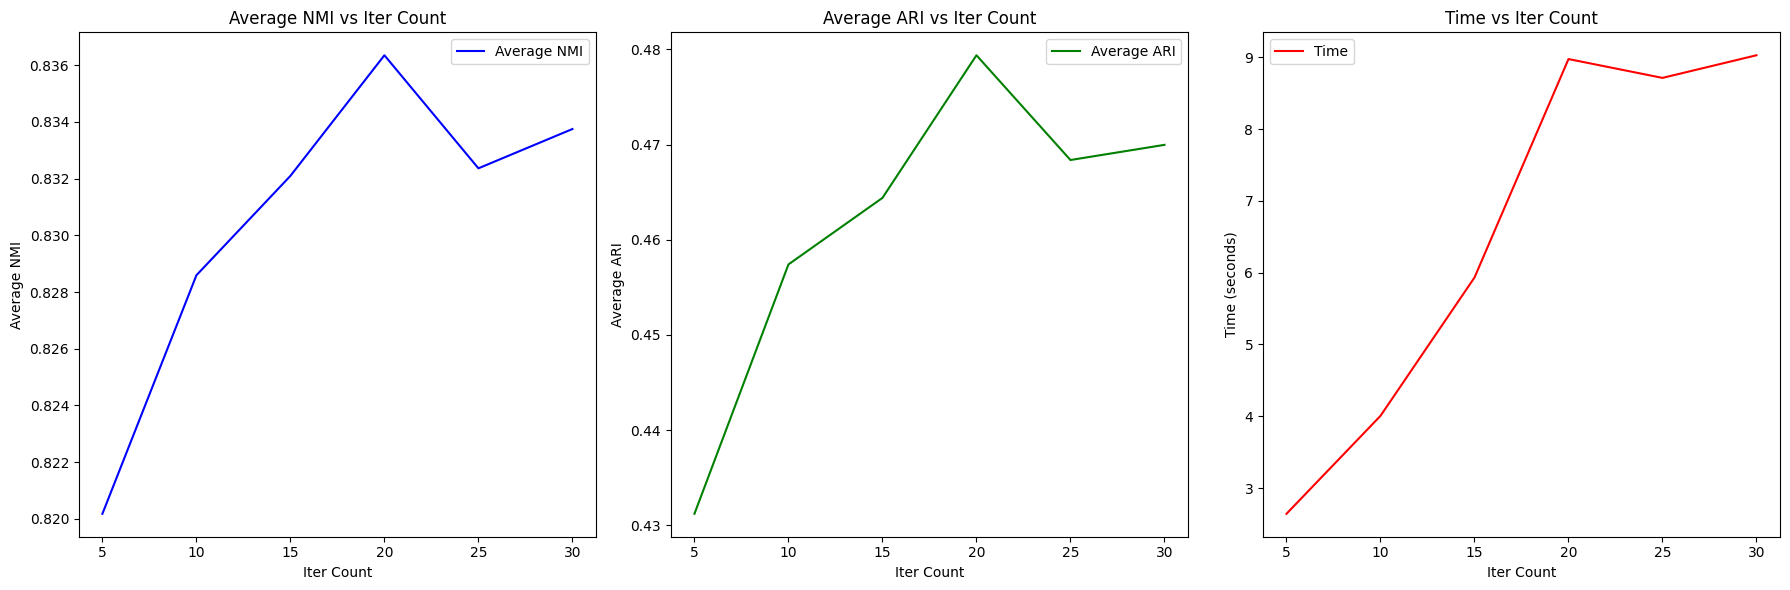

In [8]:
import matplotlib.pyplot as plt

iter_counts = list(range(5, 35, 5))
avg_nmi_values = []
avg_ari_values = []
iter_times = []

for iter_count in iter_counts:
    iter_start_time = time.time()
    
    all_labels = []
    for i in range(10):
        labels = equal_size_kmeans(SE, 65, iter_count)
        new_labels = map_arrangement(labels)
        all_labels.append(new_labels)

    total_nmi = sum(normalized_mutual_info_score(all_labels[i], all_labels[j]) for i in range(10) for j in range(10) if i != j)
    total_ari = sum(adjusted_rand_score(all_labels[i], all_labels[j]) for i in range(10) for j in range(10) if i != j)
                
    avg_nmi = total_nmi / 90
    avg_ari = total_ari / 90
    avg_nmi_values.append(avg_nmi)
    avg_ari_values.append(avg_ari)
    
    iter_end_time = time.time()
    iter_elapsed_time = iter_end_time - iter_start_time
    iter_times.append(iter_elapsed_time)
    print(f"Iter count {iter_count}: NMI = {avg_nmi}, ARI = {avg_ari}, Time = {iter_elapsed_time:.6f} seconds")

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(iter_counts, avg_nmi_values, label='Average NMI', color='blue')
plt.xlabel('Iter Count')
plt.ylabel('Average NMI')
plt.title('Average NMI vs Iter Count')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(iter_counts, avg_ari_values, label='Average ARI', color='green')
plt.xlabel('Iter Count')
plt.ylabel('Average ARI')
plt.title('Average ARI vs Iter Count')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(iter_counts, iter_times, label='Time', color='red')
plt.xlabel('Iter Count')
plt.ylabel('Time (seconds)')
plt.title('Time vs Iter Count')
plt.legend()

plt.tight_layout()
plt.show()

Iter count 1: NMI = 0.679151048583851, ARI = 0.09883400809716607, Time = 1.669122 seconds
Iter count 2: NMI = 0.7968124681945623, ARI = 0.3621495951417007, Time = 2.286855 seconds
Iter count 3: NMI = 0.7931957274367711, ARI = 0.3534757085020241, Time = 2.645876 seconds
Iter count 4: NMI = 0.7991879676036945, ARI = 0.3724303643724698, Time = 3.968301 seconds
Iter count 5: NMI = 0.809133103764326, ARI = 0.3999195344129554, Time = 3.432159 seconds
Iter count 6: NMI = 0.8125136740291821, ARI = 0.4106840080971656, Time = 4.441335 seconds
Iter count 7: NMI = 0.8234365084052486, ARI = 0.44261670040485795, Time = 4.867249 seconds
Iter count 8: NMI = 0.8204529239257095, ARI = 0.43197520242914983, Time = 5.537787 seconds
Iter count 9: NMI = 0.8302518479066865, ARI = 0.4614073886639677, Time = 6.060433 seconds
Iter count 10: NMI = 0.8344789605648518, ARI = 0.47106508097165994, Time = 6.585577 seconds


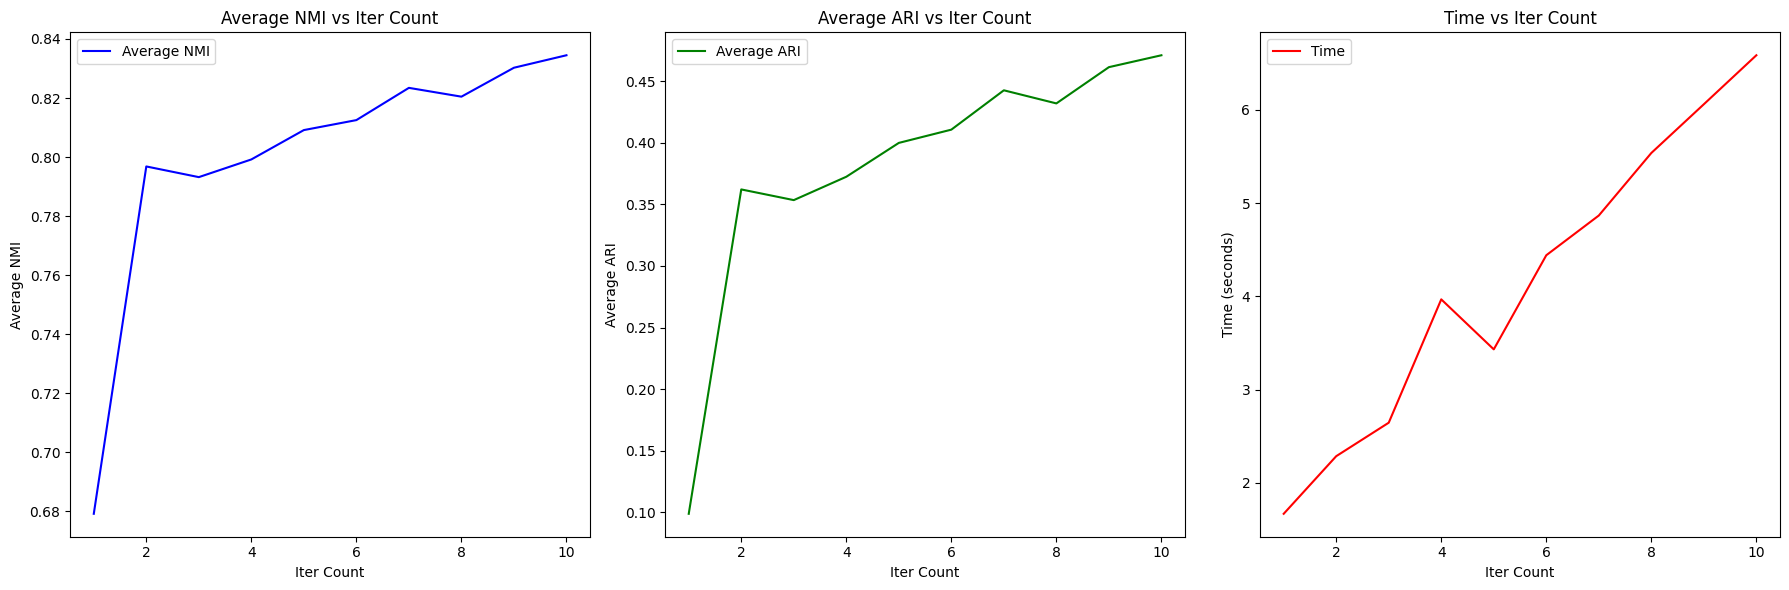

In [10]:
import matplotlib.pyplot as plt

runs = 20
iter_counts = list(range(1, 11))
avg_nmi_values = []
avg_ari_values = []
iter_times = []

for iter_count in iter_counts:
    iter_start_time = time.time()
    
    all_labels = []
    for i in range(runs):
        labels = equal_size_kmeans(SE, 65, iter_count)
        new_labels = map_arrangement(labels)
        all_labels.append(new_labels)

    total_nmi = sum(normalized_mutual_info_score(all_labels[i], all_labels[j]) for i in range(runs) for j in range(runs) if i != j)
    total_ari = sum(adjusted_rand_score(all_labels[i], all_labels[j]) for i in range(runs) for j in range(runs) if i != j)
                
    avg_nmi = total_nmi / (runs * (runs - 1))
    avg_ari = total_ari / (runs * (runs - 1))
    avg_nmi_values.append(avg_nmi)
    avg_ari_values.append(avg_ari)
    
    iter_end_time = time.time()
    iter_elapsed_time = iter_end_time - iter_start_time
    iter_times.append(iter_elapsed_time)
    print(f"Iter count {iter_count}: NMI = {avg_nmi}, ARI = {avg_ari}, Time = {iter_elapsed_time:.6f} seconds")

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(iter_counts, avg_nmi_values, label='Average NMI', color='blue')
plt.xlabel('Iter Count')
plt.ylabel('Average NMI')
plt.title('Average NMI vs Iter Count')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(iter_counts, avg_ari_values, label='Average ARI', color='green')
plt.xlabel('Iter Count')
plt.ylabel('Average ARI')
plt.title('Average ARI vs Iter Count')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(iter_counts, iter_times, label='Time', color='red')
plt.xlabel('Iter Count')
plt.ylabel('Time (seconds)')
plt.title('Time vs Iter Count')
plt.legend()

plt.tight_layout()
plt.show()

Iter count 1: NMI = 0.6783108711877548, ARI = 0.09819453441295542, Time = 1.697539 seconds
Iter count 2: NMI = 0.7847853573445335, ARI = 0.3327502024291497, Time = 2.780182 seconds
Iter count 3: NMI = 0.7970490898612921, ARI = 0.36542894736842113, Time = 3.228479 seconds
Iter count 4: NMI = 0.8058741798241374, ARI = 0.39063076923076934, Time = 3.346792 seconds
Iter count 5: NMI = 0.8032712434323339, ARI = 0.3853920040485829, Time = 3.592110 seconds
Iter count 6: NMI = 0.817526695169548, ARI = 0.4226864372469633, Time = 5.013415 seconds
Iter count 7: NMI = 0.8147760205008434, ARI = 0.4165376518218625, Time = 5.544621 seconds
Iter count 8: NMI = 0.8232545623109918, ARI = 0.44136234817813746, Time = 6.714357 seconds
Iter count 9: NMI = 0.8306737287403202, ARI = 0.46204686234817777, Time = 8.976565 seconds
Iter count 10: NMI = 0.8280605876044288, ARI = 0.45375010121457465, Time = 7.954544 seconds


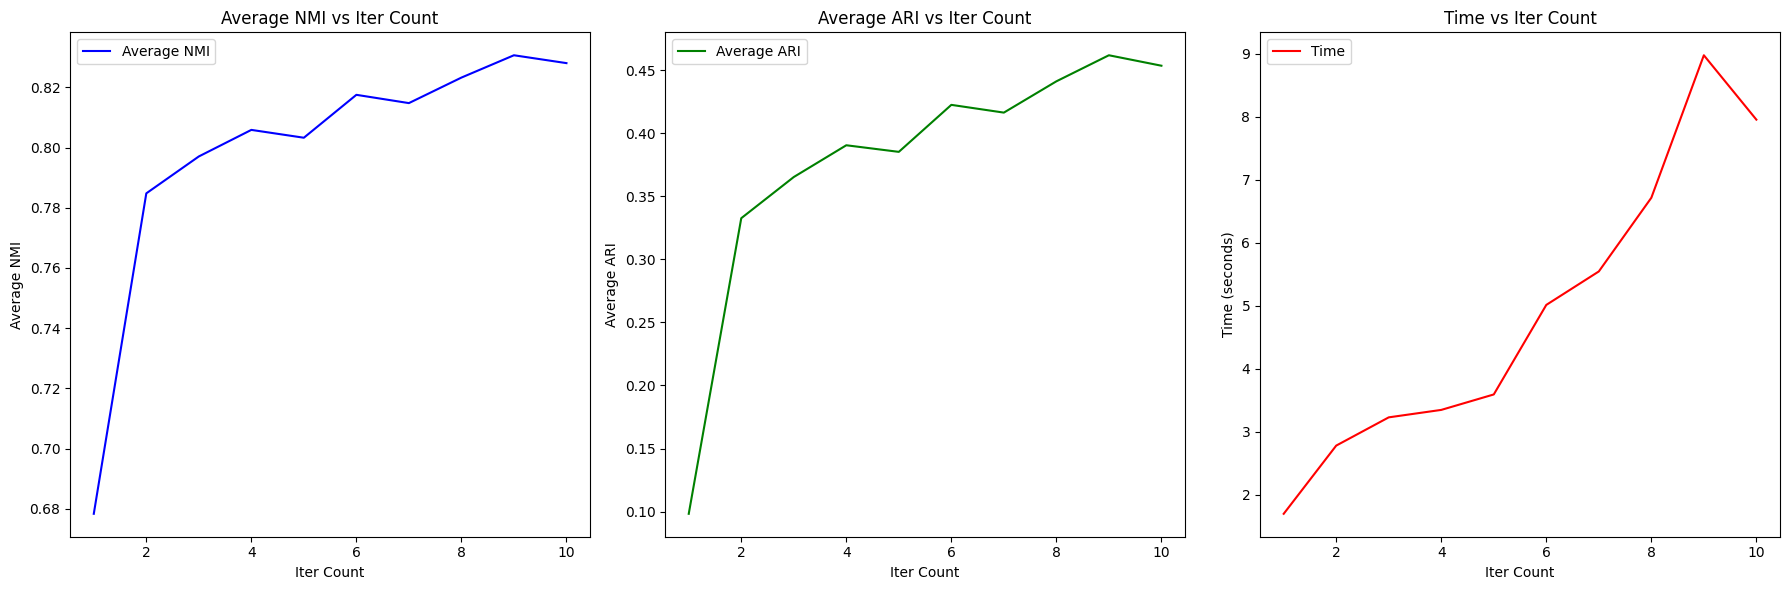

In [11]:
import matplotlib.pyplot as plt

runs = 20
iter_counts = list(range(1, 11))
avg_nmi_values = []
avg_ari_values = []
iter_times = []

for iter_count in iter_counts:
    iter_start_time = time.time()
    
    all_labels = []
    for i in range(runs):
        labels = equal_size_kmeans(SE, 65, iter_count)
        new_labels = map_arrangement(labels)
        all_labels.append(new_labels)

    total_nmi = sum(normalized_mutual_info_score(all_labels[i], all_labels[j]) for i in range(runs) for j in range(runs) if i != j)
    total_ari = sum(adjusted_rand_score(all_labels[i], all_labels[j]) for i in range(runs) for j in range(runs) if i != j)
                
    avg_nmi = total_nmi / (runs * (runs - 1))
    avg_ari = total_ari / (runs * (runs - 1))
    avg_nmi_values.append(avg_nmi)
    avg_ari_values.append(avg_ari)
    
    iter_end_time = time.time()
    iter_elapsed_time = iter_end_time - iter_start_time
    iter_times.append(iter_elapsed_time)
    print(f"Iter count {iter_count}: NMI = {avg_nmi}, ARI = {avg_ari}, Time = {iter_elapsed_time:.6f} seconds")

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(iter_counts, avg_nmi_values, label='Average NMI', color='blue')
plt.xlabel('Iter Count')
plt.ylabel('Average NMI')
plt.title('Average NMI vs Iter Count')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(iter_counts, avg_ari_values, label='Average ARI', color='green')
plt.xlabel('Iter Count')
plt.ylabel('Average ARI')
plt.title('Average ARI vs Iter Count')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(iter_counts, iter_times, label='Time', color='red')
plt.xlabel('Iter Count')
plt.ylabel('Time (seconds)')
plt.title('Time vs Iter Count')
plt.legend()

plt.tight_layout()
plt.show()

Iter count 1: NMI = 0.6813036910678145, ARI = 0.1031112872841445, Time = 7.486666 seconds
Iter count 2: NMI = 0.7850208940840152, ARI = 0.3328766248037667, Time = 10.893455 seconds
Iter count 3: NMI = 0.79859938041738, ARI = 0.3685115384615384, Time = 11.812136 seconds
Iter count 4: NMI = 0.799454243876084, ARI = 0.37268233908948234, Time = 12.692972 seconds
Iter count 5: NMI = 0.813825334561505, ARI = 0.412884788069074, Time = 14.034773 seconds
Iter count 6: NMI = 0.8174466485066584, ARI = 0.42307781789639026, Time = 15.074619 seconds
Iter count 7: NMI = 0.8194275954243175, ARI = 0.43012113029827237, Time = 15.782084 seconds
Iter count 8: NMI = 0.8254493761108507, ARI = 0.4472938932496078, Time = 21.203530 seconds
Iter count 9: NMI = 0.828333937267728, ARI = 0.4548089638932495, Time = 18.418764 seconds
Iter count 10: NMI = 0.8269309289728293, ARI = 0.45099166405023544, Time = 19.640042 seconds


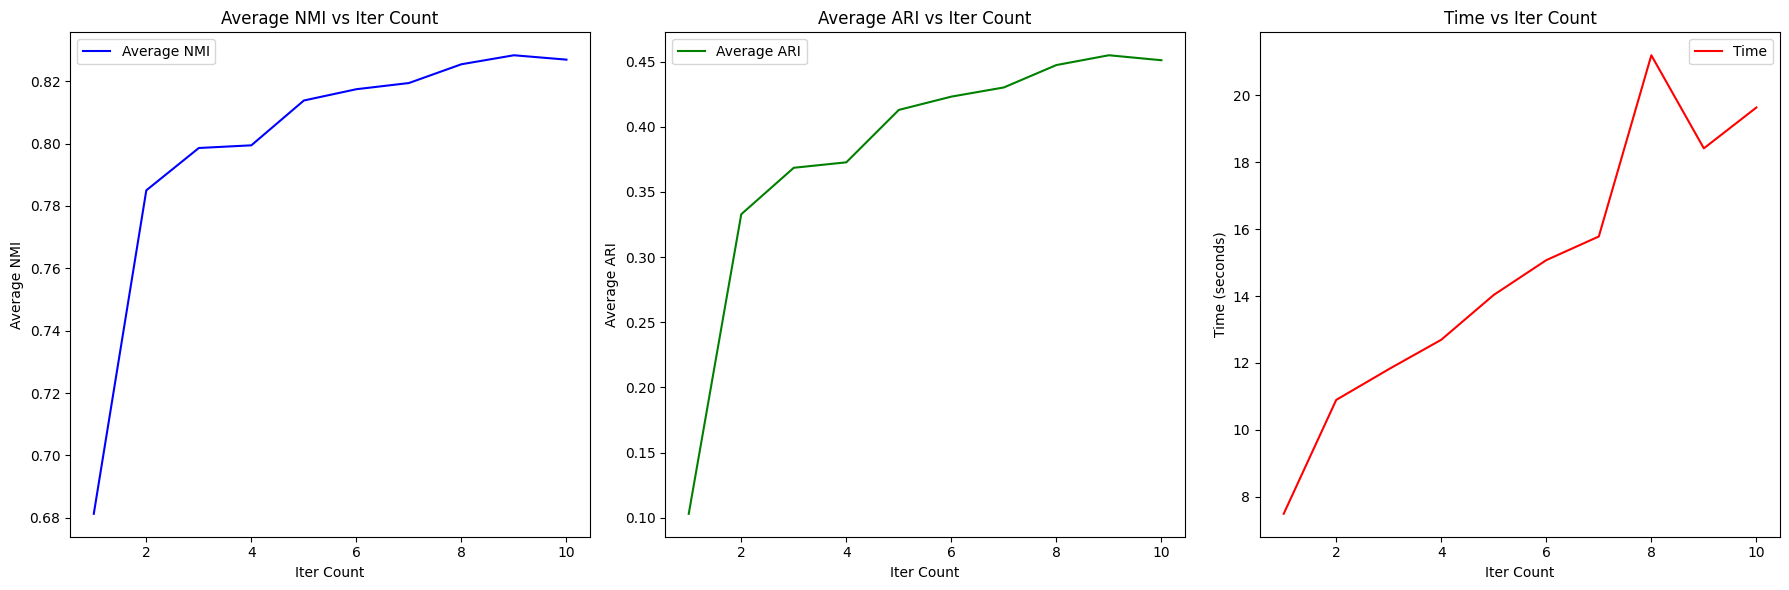

In [12]:
import matplotlib.pyplot as plt

runs = 50
iter_counts = list(range(1, 11))
avg_nmi_values = []
avg_ari_values = []
iter_times = []

for iter_count in iter_counts:
    iter_start_time = time.time()
    
    all_labels = []
    for i in range(runs):
        labels = equal_size_kmeans(SE, 65, iter_count)
        new_labels = map_arrangement(labels)
        all_labels.append(new_labels)

    total_nmi = sum(normalized_mutual_info_score(all_labels[i], all_labels[j]) for i in range(runs) for j in range(runs) if i != j)
    total_ari = sum(adjusted_rand_score(all_labels[i], all_labels[j]) for i in range(runs) for j in range(runs) if i != j)
                
    avg_nmi = total_nmi / (runs * (runs - 1))
    avg_ari = total_ari / (runs * (runs - 1))
    avg_nmi_values.append(avg_nmi)
    avg_ari_values.append(avg_ari)
    
    iter_end_time = time.time()
    iter_elapsed_time = iter_end_time - iter_start_time
    iter_times.append(iter_elapsed_time)
    print(f"Iter count {iter_count}: NMI = {avg_nmi}, ARI = {avg_ari}, Time = {iter_elapsed_time:.6f} seconds")

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(iter_counts, avg_nmi_values, label='Average NMI', color='blue')
plt.xlabel('Iter Count')
plt.ylabel('Average NMI')
plt.title('Average NMI vs Iter Count')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(iter_counts, avg_ari_values, label='Average ARI', color='green')
plt.xlabel('Iter Count')
plt.ylabel('Average ARI')
plt.title('Average ARI vs Iter Count')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(iter_counts, iter_times, label='Time', color='red')
plt.xlabel('Iter Count')
plt.ylabel('Time (seconds)')
plt.title('Time vs Iter Count')
plt.legend()

plt.tight_layout()
plt.show()

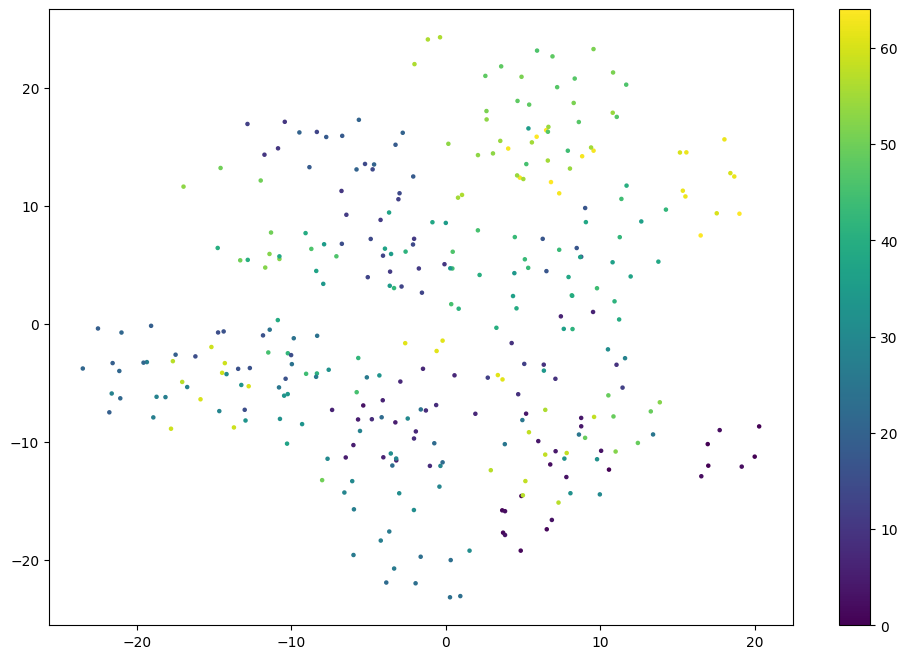

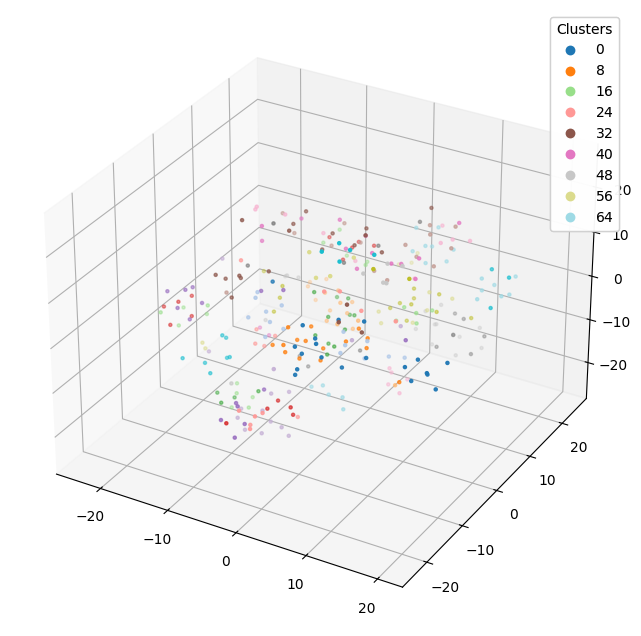

In [22]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

labels = equal_size_kmeans(SE, 65, 20)

tsne = TSNE(n_components=3, random_state=0)
SE_2d = tsne.fit_transform(SE)

plt.figure(figsize=(12, 8))
plt.scatter(SE_2d[:, 0], SE_2d[:, 1], c=labels, cmap='viridis', s=5)
plt.colorbar()
plt.show()

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(SE_2d[:, 0], SE_2d[:, 1], SE_2d[:, 2], c=labels, cmap='tab20', s=5)
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.show()

### Spectral Clustering

In [5]:
from model.spectral import *

In [6]:
import numpy as np

def equal_size_kmeans(X, k, runs=3):
    points = X.shape[0]
    size = points / k
    # Step 1: Initialize the centroids
    centroids = np.random.rand(k, X.shape[1])

    for _ in range(runs):
        cluster_assignments = np.full(X.shape[0], -1) 
        cluster_sizes = np.zeros(k, dtype=int)

        for i in range(points):
            cluster_assignments[i] = np.argmax(np.matmul(X[i], centroids.T))
            cluster_sizes[cluster_assignments[i]] += 1
        
        for j in range(k):
            while cluster_sizes[j] > size:
                excess_indices = np.where(cluster_assignments == j)[0]
                if len(excess_indices) == 0:
                    break
                excess_index = excess_indices[-1] 
                cluster_sizes[j] -= 1    

                for m in range(k):
                    if cluster_sizes[m] < size:
                        cluster_assignments[excess_index] = m
                        cluster_sizes[m] += 1
                        break
        
        for i in range(k):
            centroids[i] = np.mean(X[cluster_assignments == i], axis = 0, keepdims= True)

    return cluster_assignments

In [7]:
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.utils import shuffle
import numpy as np

def balanced_spectral_clustering(X, k, gamma=1.0):
    similarity_matrix = pairwise_kernels(X, metric='rbf', gamma=gamma)
    degree_matrix = np.diag(np.sum(similarity_matrix, axis=1))
    laplacian_matrix = degree_matrix - similarity_matrix

    eigenvalues, eigenvectors = np.linalg.eigh(laplacian_matrix)
    eigenvectors = np.array(eigenvectors)

    return equal_size_kmeans(eigenvectors[:, :k], k)

# labels = balanced_spectral_clustering(SE, 65)
# labels


In [8]:
labels = balanced_spectral_clustering(SE, 65)
labels

array([52, 29,  7, 17,  7, 53, 25, 49, 57,  5, 43, 63, 49, 62, 60, 50, 43,
       16, 35,  7, 40, 53,  6, 60, 35, 35,  5, 26, 17, 26, 60,  5, 50, 50,
        0, 26, 35,  7, 42, 52, 35,  7, 17, 57, 29, 60, 43, 59, 63, 16, 43,
       30, 53, 45, 45,  5, 45, 45, 18, 17, 63, 30, 61, 55, 60, 17, 53, 53,
       46, 54, 10, 26, 13, 10, 49,  2, 30,  3, 13, 16,  3, 50,  5, 49,  4,
       50, 47, 20, 63, 58, 43, 63, 64, 56, 26, 49, 51, 13, 54, 18, 62, 51,
       13, 30, 54, 42, 51, 41, 51,  4, 44, 41, 54, 64, 52,  0, 20,  0, 41,
        2, 16,  4, 30, 48, 41, 12, 40, 48, 40, 29, 44, 56, 40, 61, 12, 16,
       12, 40, 56, 20, 20, 18, 44, 29, 52, 18,  3, 64, 32, 18, 44, 12, 15,
       62, 62, 48, 58, 22, 62, 48, 11, 15, 15, 15, 39, 44, 48, 32, 47, 32,
       11, 11, 10, 64, 39, 38, 38, 38, 31, 31, 42, 47, 32, 22, 37, 37, 38,
       38, 37, 22, 57, 57,  0, 11, 28,  3, 32, 39,  0, 42, 25, 11, 61,  9,
       61,  9, 59, 59, 25, 57, 42, 37, 36, 36, 36, 36, 36,  4, 34,  4, 34,
        2, 34, 31, 22, 31

In [9]:
# Return the count of each element in labels
unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))

{0: 5, 1: 5, 2: 5, 3: 5, 4: 5, 5: 5, 6: 5, 7: 5, 8: 5, 9: 5, 10: 5, 11: 5, 12: 5, 13: 5, 14: 5, 15: 5, 16: 5, 17: 5, 18: 5, 19: 5, 20: 5, 21: 5, 22: 5, 23: 5, 24: 5, 25: 5, 26: 5, 27: 5, 28: 5, 29: 5, 30: 5, 31: 5, 32: 5, 33: 5, 34: 5, 35: 5, 36: 5, 37: 5, 38: 5, 39: 5, 40: 5, 41: 5, 42: 5, 43: 5, 44: 5, 45: 5, 46: 5, 47: 5, 48: 5, 49: 5, 50: 5, 51: 5, 52: 5, 53: 5, 54: 5, 55: 5, 56: 5, 57: 5, 58: 5, 59: 5, 60: 5, 61: 5, 62: 5, 63: 5, 64: 5}


In [10]:
import time

runs = 20
avg_nmi_values = []
avg_ari_values = []
iter_times = []

start_time = time.time()

all_labels = []
for i in range(runs):
    labels = balanced_spectral_clustering(SE, 65)
    new_labels = map_arrangement(labels)
    all_labels.append(new_labels)

total_nmi = sum(normalized_mutual_info_score(all_labels[i], all_labels[j]) for i in range(runs) for j in range(runs) if i != j)
total_ari = sum(adjusted_rand_score(all_labels[i], all_labels[j]) for i in range(runs) for j in range(runs) if i != j)
            
avg_nmi = total_nmi / (runs * (runs - 1))
avg_ari = total_ari / (runs * (runs - 1))

end_time = time.time()
elapsed_time = end_time - start_time

print(f"NMI = {avg_nmi}, ARI = {avg_ari}, Time = {elapsed_time:.6f} seconds")

NMI = 0.8311243267755968, ARI = 0.46756437246963556, Time = 1.477542 seconds


Gamma 0.1, Run 1: NMI = 0.7447035691233505, ARI = 0.24285769230769233, Time = 1.031719 seconds
Gamma 0.1, Run 2: NMI = 0.743349871573562, ARI = 0.2405730769230769, Time = 0.590676 seconds
Gamma 0.1, Run 3: NMI = 0.7436691706006257, ARI = 0.24251153846153845, Time = 0.747038 seconds
Gamma 0.5, Run 1: NMI = 0.8168745943589897, ARI = 0.4320653846153848, Time = 0.556998 seconds
Gamma 0.5, Run 2: NMI = 0.8210141796013771, ARI = 0.44238076923076936, Time = 0.825739 seconds
Gamma 0.5, Run 3: NMI = 0.8191373392039907, ARI = 0.43615000000000004, Time = 0.684390 seconds
Gamma 1, Run 1: NMI = 0.8342925012090412, ARI = 0.47779230769230746, Time = 0.579391 seconds
Gamma 1, Run 2: NMI = 0.8336012166768227, ARI = 0.47443461538461534, Time = 0.503858 seconds
Gamma 1, Run 3: NMI = 0.8353480205879992, ARI = 0.4791423076923078, Time = 0.493100 seconds
Gamma 5, Run 1: NMI = 0.8333870314359354, ARI = 0.47086923076923076, Time = 0.489305 seconds
Gamma 5, Run 2: NMI = 0.8325455662344218, ARI = 0.468826923076

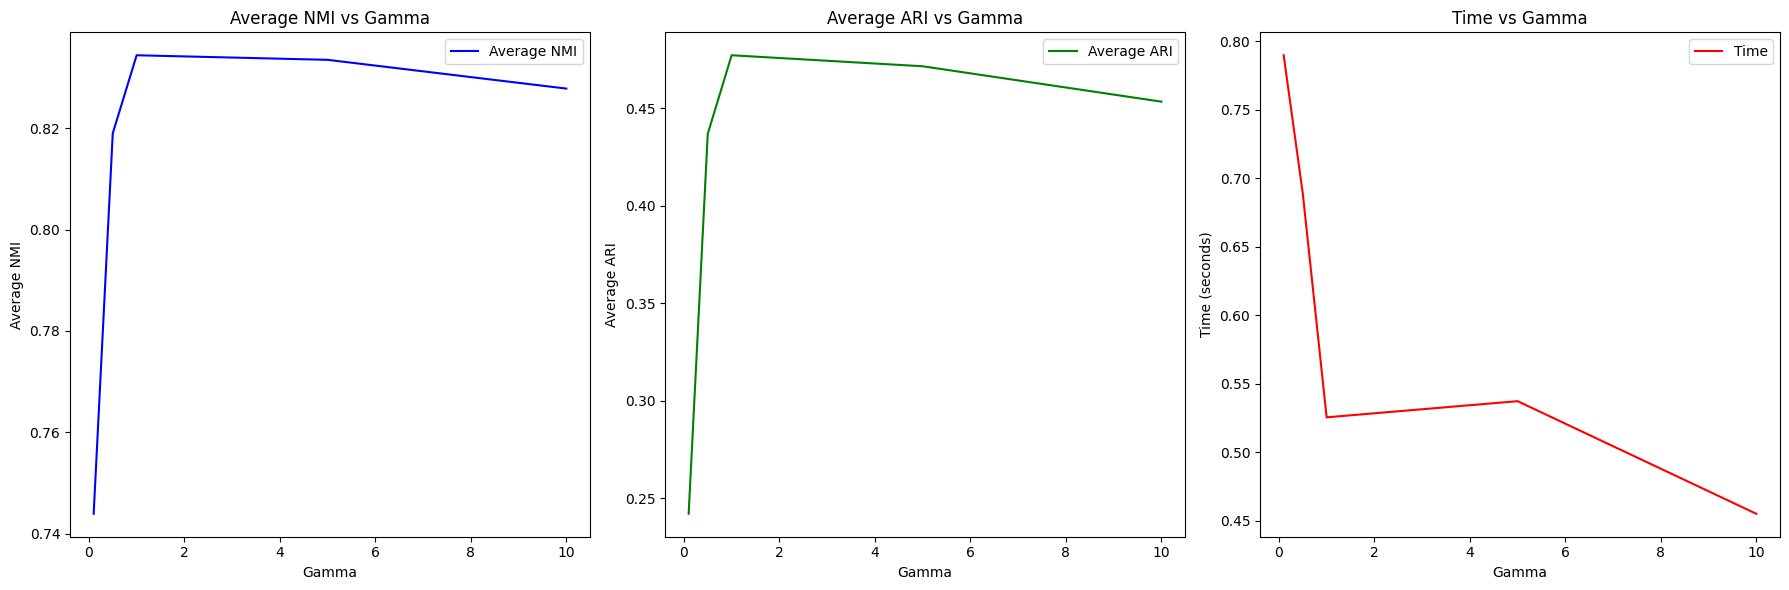

In [11]:
import matplotlib.pyplot as plt

gamma_values = [0.1, 0.5, 1, 5, 10]
nmi_values = []
ari_values = []
times = []

for gamma in gamma_values:
    total_nmi = 0
    total_ari = 0
    total_time = 0
    
    for run in range(3):
        start_time = time.time()
        
        all_labels = []
        for i in range(10):
            labels = balanced_spectral_clustering(SE, 65, gamma=gamma)
            new_labels = map_arrangement(labels)
            all_labels.append(new_labels)

        run_nmi = sum(normalized_mutual_info_score(all_labels[i], all_labels[j]) for i in range(10) for j in range(10) if i != j)
        run_ari = sum(adjusted_rand_score(all_labels[i], all_labels[j]) for i in range(10) for j in range(10) if i != j)
                    
        avg_nmi = run_nmi / (10 * (10 - 1))
        avg_ari = run_ari / (10 * (10 - 1))
        
        total_nmi += avg_nmi
        total_ari += avg_ari
        
        end_time = time.time()
        elapsed_time = end_time - start_time
        total_time += elapsed_time
        print(f"Gamma {gamma}, Run {run+1}: NMI = {avg_nmi}, ARI = {avg_ari}, Time = {elapsed_time:.6f} seconds")
    
    nmi_values.append(total_nmi / 3)
    ari_values.append(total_ari / 3)
    times.append(total_time / 3)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(gamma_values, nmi_values, label='Average NMI', color='blue')
plt.xlabel('Gamma')
plt.ylabel('Average NMI')
plt.title('Average NMI vs Gamma')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(gamma_values, ari_values, label='Average ARI', color='green')
plt.xlabel('Gamma')
plt.ylabel('Average ARI')
plt.title('Average ARI vs Gamma')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(gamma_values, times, label='Time', color='red')
plt.xlabel('Gamma')
plt.ylabel('Time (seconds)')
plt.title('Time vs Gamma')
plt.legend()

plt.tight_layout()
plt.show()